Install TreeInterpreter <br>
[Github](https://github.com/andosa/treeinterpreter) <br>
[Blog Explainer](http://blog.datadive.net/interpreting-random-forests/)


In [1]:
!pip install treeinterpreter

Setting up


In [44]:
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 #Load Dataset
from sklearn.datasets import load_boston
boston = load_boston()
#Set model type as Random Forest Regressor
rf = RandomForestRegressor()

#Calculating bias and feature prediction for two rows of data

In [3]:
# Lets use the first 300 rows of data
X = boston.data[:300] # Input Features
y = boston.target[:300] # Target Vector
rf.fit(X, y) # Fit the model on X and y

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [4]:
instances = boston.data[[300, 309]]
#print(instances) # Two rows of houses
print ("Instance 0 prediction:", rf.predict([instances[0]]))
print ("Instance 1 prediction:", rf.predict([instances[1]]))

Instance 0 prediction: [30.083]
Instance 1 prediction: [22.859]


In [5]:
# Use TreeInterpreter to caluclate bias and contributions
prediction, bias, contributions = ti.predict(rf, instances)
# Finding bias and contributions for each prediction 
for i in range(len(instances)):
    print ("Instance", i)
    print ("Bias (trainset mean)", bias[i])
    print ("Feature contributions:")
    for contri, feature in sorted(zip(contributions[i], 
                                 boston.feature_names), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(contri, 2))
    print ("-"*20 )

Instance 0
Bias (trainset mean) 25.420420000000007
Feature contributions:
RM 3.25
LSTAT 1.15
PTRATIO 0.5
TAX -0.39
INDUS 0.18
DIS -0.14
CRIM -0.14
ZN 0.13
AGE 0.12
RAD 0.11
B -0.09
CHAS -0.02
NOX -0.0
--------------------
Instance 1
Bias (trainset mean) 25.420420000000007
Feature contributions:
RM -5.33
LSTAT 2.4
CRIM 0.4
TAX -0.19
DIS 0.13
INDUS 0.09
B -0.08
AGE -0.03
PTRATIO 0.03
RAD 0.03
NOX 0.02
CHAS -0.01
ZN -0.01
--------------------


<function matplotlib.pyplot.show>

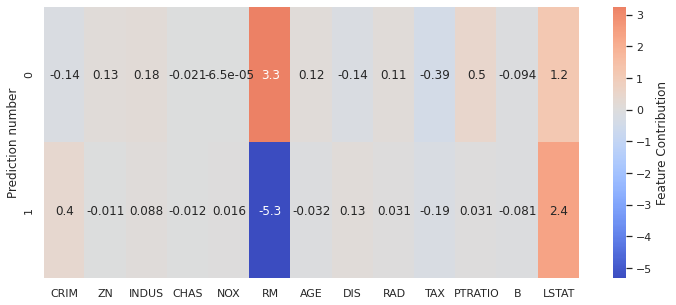

In [74]:
sns.set_theme(context='poster')
x_axis_labels = boston.feature_names
sns.set(font_scale=1)
plt.figure(figsize=(12,5))
ax = sns.heatmap(contributions, xticklabels=x_axis_labels, cmap="coolwarm", annot=True, cbar_kws={'label':'Feature Contribution'},center=0)
plt.ylabel("Prediction number")
plt.show

Verifiying the methodology by - <br>
Bias + Contribution = Prediction <br>
Which proves correct. ( As seen by comapring with previously calculated values)

In [21]:
print ("Prediction: ",prediction)
print ("Addition: ",bias + np.sum(contributions, axis=1))

Prediction:  [[30.083]
 [22.859]]
Addition:  [30.083 22.859]


# Calculating feature contributions of the whole model


Splitting dataset into two (~100 rows)



In [22]:
ds1 = boston.data[300:400]
ds2 = boston.data[400:]
 
print (np.mean(rf.predict(ds1)))
print (np.mean(rf.predict(ds2)))

22.298079999999995
18.397207547169806


Predicting biases and contributions for both

In [23]:
prediction1, bias1, contributions1 = ti.predict(rf, ds1)
prediction2, bias2, contributions2 = ti.predict(rf, ds2)

Calculcating average contributions for each feature

In [24]:
totalc1 = np.mean(contributions1, axis=0) 
totalc2 = np.mean(contributions2, axis=0) 

Verifying

In [25]:
print (np.sum(totalc1 - totalc2))
print (np.mean(prediction1) - np.mean(prediction2))

3.900872452830186
3.900872452830182


The sum of the feature contribution differences should be equal to the difference in average prediction

In [26]:
for c, feature in sorted(zip(totalc1 - totalc2, 
                             boston.feature_names), reverse=True):
    print (feature, round(c, 2))

LSTAT 2.68
CRIM 0.55
RM 0.51
PTRATIO 0.08
AGE 0.07
NOX 0.06
B 0.04
INDUS 0.03
TAX 0.03
ZN 0.01
CHAS -0.01
RAD -0.06
DIS -0.09


<function matplotlib.pyplot.show>

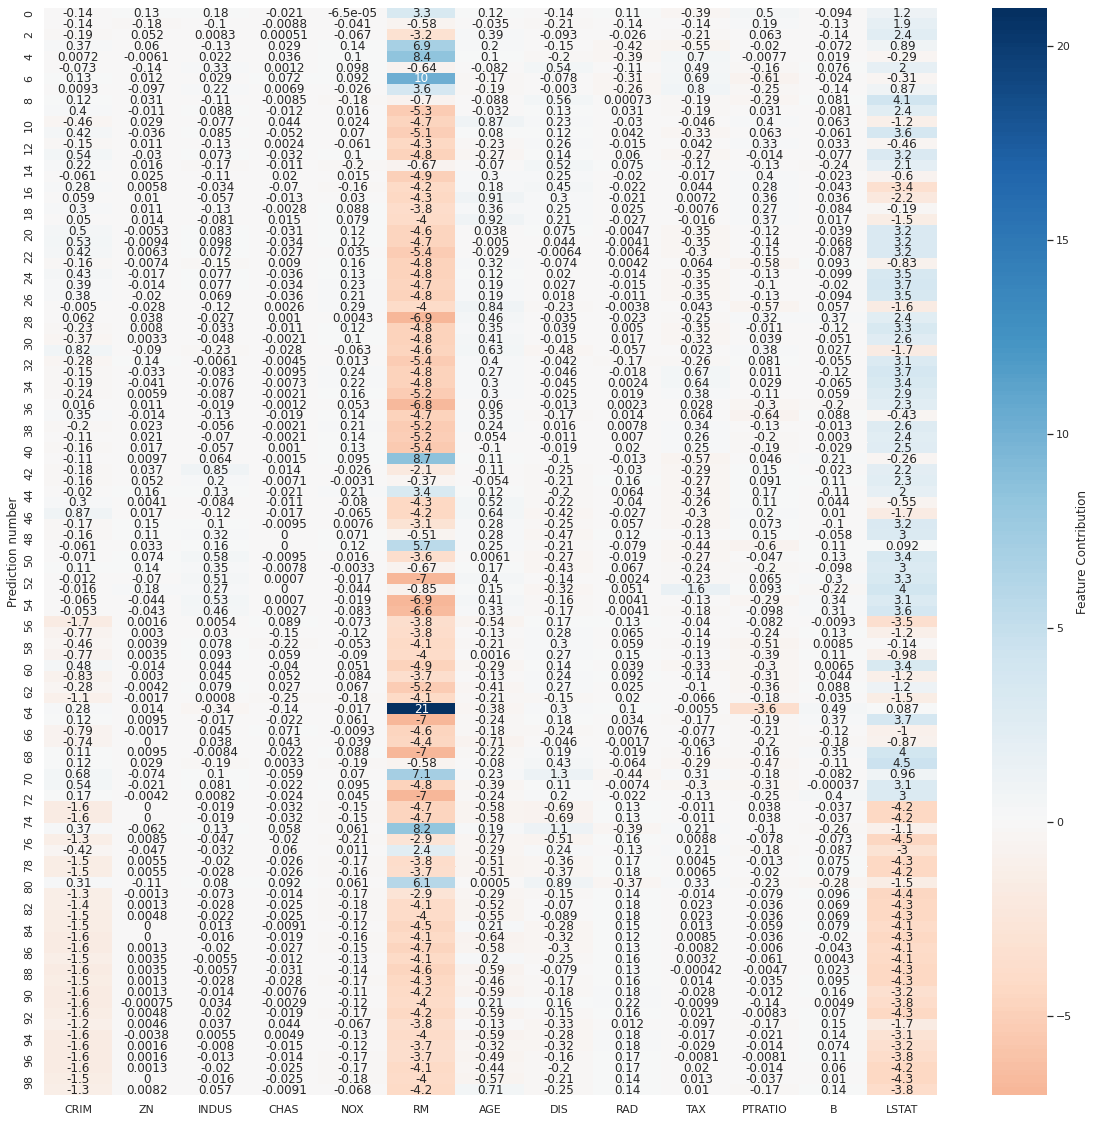

In [79]:
sns.set_theme(context='poster')
x_axis_labels = boston.feature_names
sns.set(font_scale=1)
plt.figure(figsize=(20,20))
ax = sns.heatmap(contributions1, xticklabels=x_axis_labels, cmap="RdBu", annot=True, cbar_kws={'label':'Feature Contribution'},center=0)
plt.ylabel("Prediction number")
plt.show

<function matplotlib.pyplot.show>

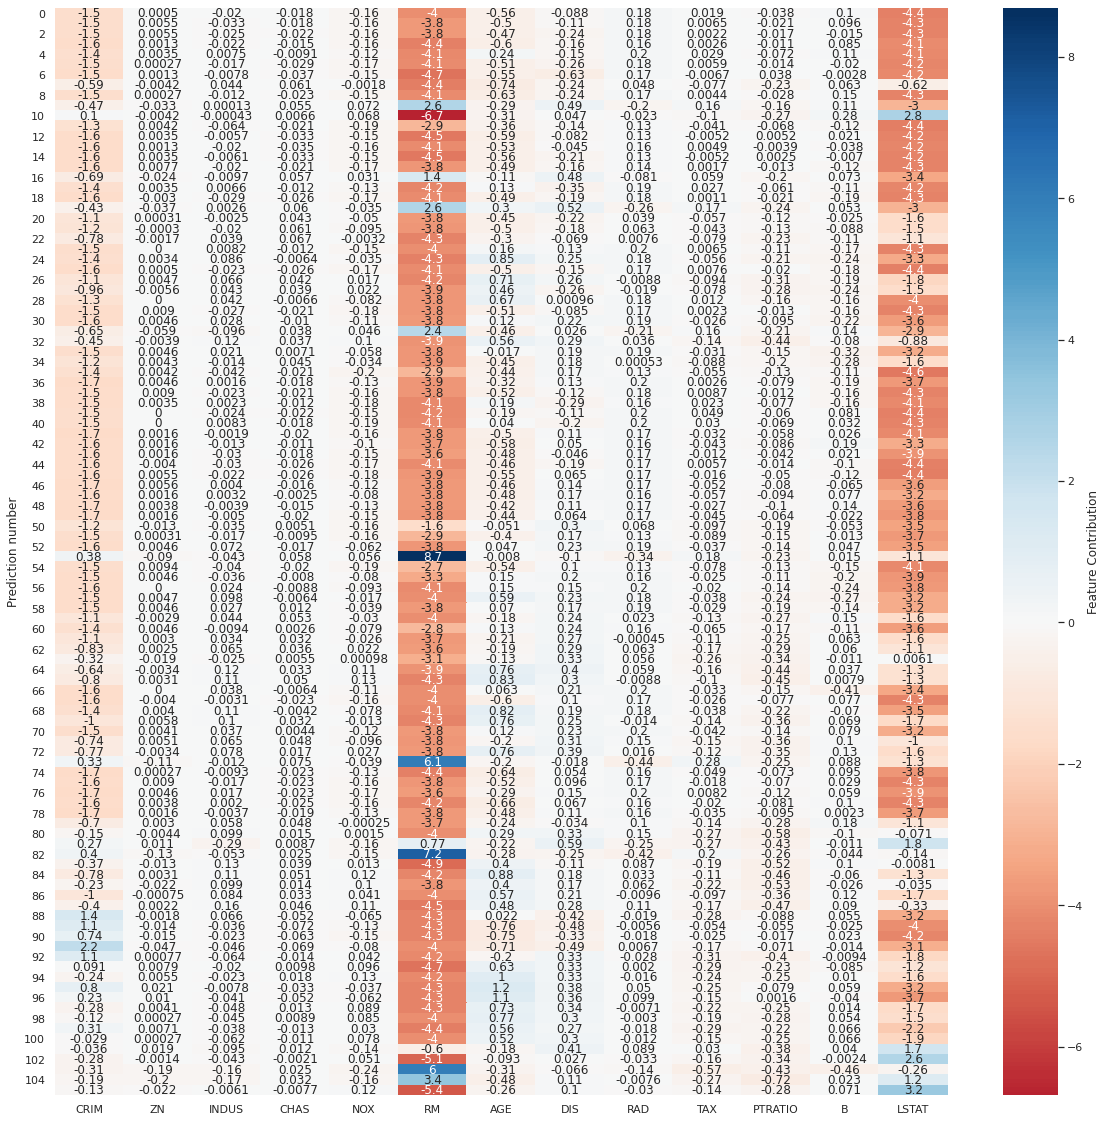

In [80]:
sns.set_theme(context='poster')
x_axis_labels = boston.feature_names
sns.set(font_scale=1)
plt.figure(figsize=(20,20))
ax = sns.heatmap(contributions2, xticklabels=x_axis_labels, cmap="RdBu", annot=True, cbar_kws={'label':'Feature Contribution'},center=0)
plt.ylabel("Prediction number")
plt.show